In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X=data.iloc[:,2:4].values #creating numpy array thru values
X.shape

(400, 2)

In [4]:
X[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [5]:
y=data.iloc[:,-1].values
y.shape

(400,)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(320, 2) (80, 2) (320,) (80,)


In [8]:
#Scaling because of difference in range of age and Estimated Salary
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [10]:
X_train[:5]

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763]])

In [11]:
#first_method, taking sqroot of no of data
np.sqrt(X_train.shape[0])

17.88854381999832

In [12]:
k=17

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [14]:
#Training our model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [15]:
y_pred=knn.predict(X_test)

In [16]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [17]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [18]:
print(y_pred.shape,y_test.shape)

(80,) (80,)


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.925

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[47,  5],
       [ 1, 27]], dtype=int64)

In [21]:
#Second method
accuracy=[]
for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [22]:
print(accuracy)

[0.8625, 0.8625, 0.9, 0.9125, 0.925, 0.925, 0.925, 0.9375, 0.9375, 0.9375, 0.925, 0.925, 0.925, 0.9125, 0.925, 0.925, 0.925, 0.925, 0.925, 0.9375, 0.9375, 0.9375, 0.9375, 0.925, 0.9375]


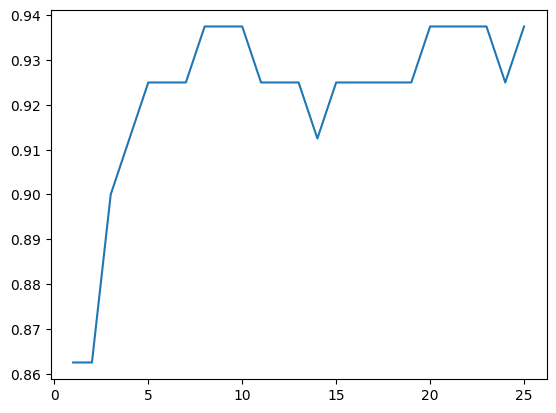

In [23]:
plt.plot(range(1,26),accuracy)

In [24]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [25]:
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.925

In [26]:
#Dumping ML model
import pickle

In [27]:
pickle.dump(knn,open('model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

In [28]:
def predict_output():
    age=int(input("Enter age: "))
    salary=int(input("Enter salary: "))
    X_new=np.array([[age],[salary]]).reshape(1,2)
    X_new=scaler.transform(X_new)
    return "Will purchase" if knn.predict(X_new)[0] else "Will not purchase"

In [29]:
print(predict_output())

Enter age: 54
Enter salary: 45000
Will purchase
